## Chapter 10

### 인공 뉴런

* 초기 신경망 모델 : 하나 이상의 이진 입력과 이진 출력 하나를 가짐.
* 퍼셉트론 : 입력과 출력이 이진 값이 아닌 어떠한 숫자이고, 각 입력 연결이 가중치와 연관되어 있는 인공 뉴런(TLU, 또는 LTU)을 기반으로 한 인공 신경망 구조.
  * TLU는 입력의 가중치 합을 계산($z=w_1x_1+w_2x_2+...+w_nx_n=\mathbf{x}^T\mathbf{w}$)한 뒤 그 합에 계단 함수(step function)를 적용하여 결과를 출력함
  * $h_w(\mathbf{x})=step(z), z=\mathbf{x}^T\mathbf{w}$
  * 자주 사용되는 계단 함수는 heaviside 계단 함수 $\text{heaviside}(z)=\begin{cases}
0, & z<0일 때 \\
1, & z\geq0일 때
\end{cases}$ 또는 부호 함수도 사용$\text{sgn}(z)=\begin{cases}
-1, & z<0일 때 \\
0, & z=0일 때 \\
1, & z>0일 때
\end{cases}$
* 하나의 TLU로는 간단한 선형 분류 문제에 사용할 수 있음. 로지스틱 회귀나 SVM 분류기처럼 임의의 선형 조합을 계산해 그 결과가 임곗값을 넘으면 양성 클래스를 출력하고 그렇지 않으면 음성 클래스 출력.
* 퍼셉트론은 층이 하나뿐인 TLU로 구성. 각 TLU는 모든 입력에 연결되어 있음. 퍼셉트론의 입력을 입력 뉴런이라는 특별한 통과 뉴련에 주입.
  * 입력 뉴런 : 어떤 입력이 주입되든 출력으로 통과시키는 것.
  * 입력층은 모두 입력 뉴런으로 구성되고, 편향 특성($x_0=1$)이 더해짐. 이 편향 특성은 입력 없이 항상 1을 출력하는 특별한 종류의 뉴런인 편향 뉴런으로 표현됨. 즉, 출력 층의 입력으로 입력 층 뉴런과 편향 뉴런이 들어옴.
* 완전 연결 층(fully connected layer, 또는 밀집 층(dense layer)) : 한 층의 모든 뉴런이 이전 층의 모든 뉴련과 연결되어 있는 것.
* 출력의 수학적 표현 : $h_{\mathbf{W}, b}(\mathbf{X})=\phi(\mathbf{XW}+\mathbf{b})$
  * $\mathbf{X}$ : 입력 특성의 행렬. 행은 샘플, 열은 특성
  * $\mathbf{W}$ : 편향 뉴런을 제외한 모든 연결 가중치가 포함된 행렬. 행은 입려 뉴런, 열은 출력층에 있는 인공 뉴런
  * $\mathbf{b}$ : 편향 뉴런과 인공 뉴런 사이의 연결 가중치.
  * $\phi$ : 활성화 함수. 여기서는 계단 함수.
* 퍼셉트론은 생물학적 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 더 강해진다는 헤브의 규칙에 영향을 받아 학습함. 퍼셉트론의 학습 규칙은 오차가 감소되도록 연결이 강화됨.
  * 학습 규칙 : $w_{i,j}^{(next step)}=w_{i,j}+\eta(y_j-\hat{y}_j)x_i$
    * $w_{i,j}$ : i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치
    * $x_i$ : 현재 훈련 샘플의 i번째 뉴런의 입력값
    * $\hat{y}_j$ : 현재 훈련 샘플의 j번째 출력 뉴런의 출력값
    * $y_i$ : 현재 훈련 샘플의 j번째 출력 뉴런의 타깃값
    * $\eta$ : 학습률
* 각 출력 뉴런의 결정 경계가 선형이므로 퍼셉트론은 복잡한 패턴을 학습하지 못하지만, 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다는 것이 증명되었고, 이를 퍼셉트론 수렴 이론이라고 함.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron # 하나의 TLU 네트워크를 구현한 클래스.

iris = load_iris()
X = iris.data[:, (2,3)]     # 꽃잎의 길이와 너비
y = (iris.target==0).astype(np.int) # 꽃잎이 Iris Setosa인지 아닌지

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])    # 길이와 너비가 2, 0.5인 꽃잎은 Iris Setosa

<ipython-input-6-2c506bbdd20d>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target==0).astype(np.int) # 꽃잎이 Iris Setosa인지 아닌지


In [7]:
y_pred

array([0])

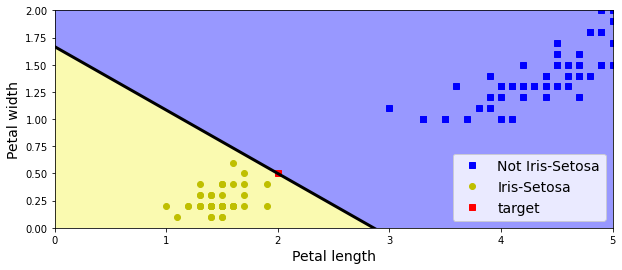

In [8]:
import matplotlib.pyplot as plt
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.plot(2, 0.5, "rs", label="target")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

* <code>Perceptron</code>클래스는 매개변수가 <code>loss="perceptron", learning_rate="constant", eta0=1, penalty=None</code>인 SGDClassifier(확률정 경사 하강법)과 같음.
* 클래스에 속할 확률은 제공하지 않으며, 고정된 입곗값을 기준으로 예측을 만들기 때문에 퍼셉트론보다는 로지스틱 회귀가 선호됨.

### 다층 퍼셉트론

* 단, 다른 선형 분류기와 바찬가지로 XOR 분류 문제와 같은 일부 간단한 문제는 풀 수 없음.
* 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있는데, 이러한 인공 신경망을 다층 퍼셉트론(MLP)아리고 함.
  * 다층 퍼셉트론은 XOR문제를 풀 수 있음.

* 입력층(통과, input layer) 하나, 하나 이상의 은닉층(hidden layer), 출력층(output layer)으로 구성됨.
  * 입력층과 가까운 층을 하위 층이라고 부르고, 출력층에 가까운 층을 상위 층이라고 부름
  * 모든 층은 편향 뉴런을 포함해 다음 층과 완전히 연결됨.
  * 신호는 입력에서 출력으로 한 방향으로만 흐르고, 이러한 구조를 피드포워드 신경망(feedforward neural network, FNN)이라고 함.
* 은닉층을 여러 개 쌓아 올린 인공 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 함. - 딥러닝

* 다층 퍼셉트론 훈련에는 역전파(backpropagation) 알고리즘을 사용함.
  * 효율적인 기법으로 gradient를 자동으로 계산하는 경사 하강법.
  * 네트워크를 정방향으로 한번, 역방향으로 한번 통과하는 것 만으로도 모든 모델 파라미터에 대한 네트워크 오차의 gradient를 계산할 수 있음. 즉, 오차를 감소시키기 위해 각 연결 가중치 값과 편향 값이 어떻게 바뀌어야 하는지 알 수 있음.
  * gradient를 구하면 평범한 경사 하강법을 수행하고 전체 과정은 네트워크가 어떠한 해결책으로 수렴할 때 까지 반복.
  * 자동으로 gradient를 계산하는 것을 자동 미분(automatic differentiation)이라고 하고, 이 중 역전파에서 사용하는 기법은 후진 모드 자동 미분(reverse-mode autodiff)을 사용. 미분할 함수가 연결 가중치와 같은 변수가 많고, 출력이 적은 경우 잘 맞음.
* 과정
  * 한 번에 하나의 미니배치씩 진행하여 전체 훈련 세트를 처리하고, 이러한 과정 하나하나를 에포크(epoch)라고 함.
    * 여러 epoch를 반복
  * 각 미니배치는 입력층으로 전달되어 첫 번째 은닉층으로 보내진 뒤, 해당 층에 있는 모든 뉴런의 출력을 계산함. 이 결과는 다음 층으로 전달됨.
  * 다음 층에서 다시 출력을 계산하고 그 결과는 그 다음 층으로 전달됨.
  * 이러한 과정을 출력층의 출력을 계산할 때 까지 계속됨. 이를 정방향 계산(forward pass)이라고 함.
  * 그 다음으로, 알고리즘이 손실 함수를 사용하여 기대하는 출력과(실제 값) 네트워크의 실제 출력(결과 값)을 비교하고 오차 측정 값을 반환함.
  * 각 출력 연결이 이 오차에 기여하는 정도를 계산. 연쇄 법칙(chain rule)을 적용하면 이 단계를 빠르고 정확하게 수행 가능.
  * 다시 연쇄 법칙을 적용하여 이전 층의 연결 가중치가 오차의 기여 정도에 얼마나 기여했는지 측정함. 이를 입력층에 도달할 때 까지 역방향으로 계속함.
  * 마지막으로 알고리즘은 경사 하강법을 수행하여 방금 계산한 오차 그레이디언트를 사용해 네트워크의 모든 연결 가중치를 수정함.
> 은닉층의 연결 가중치를 랜덤하게 초기화해야 훈련이 실패하지 않음.(ex. 모든 가중치와 편향을 0으로 초기화하면 층의 모든 뉴런이 완전히 같아지므로 역전파도 뉴런을 동일하게 바꾸어 모든 뉴런이 똑같아진 채로 남으므로 뉴런이 아무리 많아도 뉴런이 하나인 것 처럼 동작함.)
* 활성화 함수는 계단 함수 대신 로지스틱(sigmoid) 함수 $\sigma(z) = 1/(1+exp(-z))$로 바꿈.
  * 계단 함수는 수평선밖에 없으니 계산할 gradient가 없음.
  * 출력 범위는 0에서 1 사이
> 활송화 함수는 그 외에 tanh함수 ($\tanh(z) = 2\sigma(2z)-1$. S자 모양이며 연속적이고 미분 가능함. 출력 범위는 -1에서 1 사이. 훈련 초기에 각 층의 출력을 원점 근처로 모으는 영향이 있으므로 수렴이 빠르게 진행되도록 도와줌), ReLU 함수($\text{ReLU}(z) = \text{max}(0,z)$. 연속적이지만 z=0에서 미분 가능하지 않고, z<0인 경우 도함수는 0. 잘 작동하며 계산 속도가 빠르고, 출력에 최댓값이 없어서 경사 하강법의 일부 문제점을 해결함.)

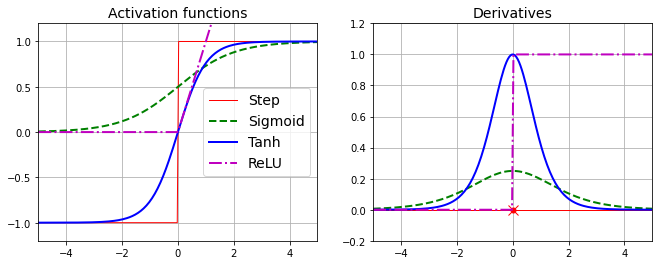

In [9]:
# from https://github.com/rickiepark/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

* 선형 변환을 여러 개 연결해봤자 또 다른 선형 변환이 되므로(ex. f(x)=2x+3과 g(x)=5x-1을 연결하면 f(g(x))=10x+1이 됨) 층 사이에 위와 같은 비선형성을 추가해야 복잡한 문제를 해결할 수 있음.
* 비선형 함수가 있는 충분히 큰 심층 신경망은 이론상 어떠한 연속 함수로도 근사할 수 있음.

* 다층 퍼셉트론은 회귀 작업에 사용 가능.
  * 값 하나를 예측하는 데 출력 뉴런이 하나만 필요함. 이 출력값이 예측된 값.
* 다변량 회귀(동시에 여러 값을 예측하는 것)는 출력 차원마다 출력 뉴런이 하나씩 필요
  * ex) 이미지에서 물체의 중심 위치를 파악하려면 2D좌표를 예측해야하므로 출력 뉴런 2개가 필요.
* 보통 회귀용 다층 퍼셉트론을 만들 때는 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 함. 단, 출력이 양수여야 한다면 출력층에 ReLU함수나 softplus(ReLU의 변종. $\text{softplus}(z)=\log(1+\exp(z))$. z가 음수일 때 0에 가까워지고 z가 큰 양수일수록 z에 가까움)함수를 사용. 어떠한 범위 안의 값을 예측하려면 sigmoid함수나 tanh함수를 사용하고 레이블의 스케일을 적절한 범위로 조정할 수 있음.
* 훈련 시 사용하는 손실 함수는 일반적으로 평균 제곱 오차를 사용.
  * 훈련 세트에 이상치가 많다면 평균 절댓값 오차를 사용할 수 있고, 또는 이 둘을 조합한 후버(Huber, 오차가 임곗값 $\sigma$(주로 1)보다 작을 때는 이차함수. 이보다 클 때는 선형 함수. 선형 함수 부분은 평균 제곱 오차보다 이상치에 덜 민감함.) 손실을 사용할 수 있음.
* 전형적인 회귀 MLP 구조    

|하이퍼파라미터     |일반적인 값|
|------------------|-----------|
|입력 뉴런 수       |특성마다 하나(ex. MNIST 데이터셋은 28*28크기 이미지이므로 784개의 뉴런)|
|은닉층 수          |문제에 따라 다름(보통 1~5)|
|은닉층 뉴런 수     |문제에 따라 다름(보통 10~100)|
|출력 뉴런 수       |예측 차원마다 하나|
|은닉층의 활성화 함수|ReLU(또는 SELU 등)|
|출력층의 활성화 함수|없음. 출력이 양수라면 ReLU, softplus. 출력을 특정 범위로 제한하면 sigmoid, tanh)|
|손실 함수          |MSE. 이상치가 있다면 MAE, Huber|

* 다층 퍼셉트론은 분류 작업에 사용 가능.
  * 이진 분류에서는 sigmoid 활성화 함수를 가진 하나의 출력 뉴런만을 필요로 하고, 출력은 0과 1사이의 실수값이 됨. 이를 양성 클래스에 대한 예측 확률로 해석가능.
  * 음성 클래스에 대한 예측 확률은 1-양성 클래스 예측 확률
* 다중 레이블 이진 분류 문제를 쉽게 처리 가능
  * ex) 이메일이 스팸 메일인지/아닌지, 긴급 메일인지/아닌지를 구별하기 위해 sigmoid 활성화 함수를 가진 두 출력 뉴런이 필요. 첫 번째 뉴런은 이메일이 스팸일 확률을 출력하고, 두 번째 뉴런은 이메일이 긴급한 메일일 화률을 출력. 출력된 확률의 하이 1이 될 필요는 없고 어떠한 레이블 조합도 출력할 수 있음.
* 각 샘플이 3개 이상의 클래스 중 한 클래스에만 속할 수 있다면(ex. 0~9까지 숫자 이미지 분류) 클래스마다 하나의 출력 뉴런이 필요하고 이를 다중 분류라고 함. 출력층은 소프트맥스 함수.
> * 소프트맥스 함수는 샘플 $ \mathbf{x} $ 각각에 대한 점수에 지수 함수를 적용한 뒤 정규화함(모든 지수 함수의 결과의 합으로 나눔.). $$ \hat{p_k}=\sigma\left(\mathbf{s}(\mathbf{x})\right)_k=\frac{\exp\left(s_k(\mathbf{x})\right)}{\sum_{j=1}^K\exp\left(s_j(\mathbf{x})\right)} $$
>   * $ K $ 는 클래스 수
>   * $ \mathbf{s}(\mathbf{x}) $ 는 샘플 $ \mathbf{x} $ 에 대한 각 클래스의 점수를 탐은 벡터
>   * $ \sigma\left(\mathbf{s}(\mathbf{x})\right)_k $ 는 샘플 $ \mathbf{x} $에 대한 각 클래스의 점수가 주어졌을 때, 이 샘플이 클래스 k에 속할 추정 확률
> * 모든 예측 확률을 0과 1사이로 만들고 이들을 더했을 때 1이 되도록 만듦(클래스가 서로 배타적일 경우 필요)
* 손실 함수는 일반적으로 크로스 엔트로피 손실(cross-entropy loss, 또는 logloss)을 선택
* 전형적인 분류 MLP 구조

|하이퍼파라미터|이진 분류|다중 레이블 분류|다중 분류|
|-------------|--------|--------------|--------|
|입력층과 은닉층|회귀와 동일|회귀와 동일|회귀와 동일|
|출력 뉴런 수  |1개        |레이블 당 1개|클래스 당 1개|
|출력 층의 활성화 함수|sigmoid|sigmoid|softmax|
|손실 함수|cross-entropy|cross-entropy|cross-entropy|

> Tensorflow Playground(https://playground.tensorflow.org) : 텐서플로를 활용한 신경망 시뮬레이터
> * ReLU사용 시 선형 경계가 만들어짐
> * 은닉층이 줄어들면 훈련에 걸리는 시간에 차이가 나고 지역 최솟값에 갇히기도 함.
> * 뉴런 수가 작으면 좋은 솔류선을 찾을 수 없고 파라미터가 너무 적어 훈련 세트에 과소적합됨.
> * 신경망이 너무 크면 빠르게 훈련되고 지역 최솟값에 갇히지 않음.
>   * 대규모 신경망은 거의 절대로 지역 최솟값에 갇히지 않음.
> * 나선형 데이터셋+4개의 은닉층+각 은닉층 별 8개의 뉴런으로 학습하면 훈련 시간이 오래 걸리고 한번씩 긴 시간동안 평탄한 지역에 갇힘. 상위 층(오른쪽)에 있는 뉴런이 하위 층(왼쪽)에 있는 뉴런보다 도 빨리 학습되는 경향이 있고, 이를 그레이디언트 소실(vanishing gradient)라고 함. 이 문제는 더 좋은 가중치 초기화, 고급 optimizer(AdaGrad, Adam 등), 배치 정규화 등을 이용해 해결 가능.

### Keras

* 모든 종류의 신경망을 손쉽게 만들고 훈련, 평가, 실행할 수 있는 고수준 딥러닝 API.
* API 문서 : http://keras.io

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.5.0'

In [12]:
keras.__version__

'2.5.0'

#### Sequential API를 이용한 이미지 분류기

In [13]:
# Fashion MNIST 데이터셋을 이용한 이미지 분류기
# 숫자 손글씨 MNIST 데이터셋과 형태는 동일(28*28 크기의 흑백 이미지 70000개 및 10개의 클래스로 이루어짐), 단 손글씨 숫자가 아닌 패션 아이템을 나타내는 이미지.
# 클래스마다 샘플이 다양해 MNIST보다 훨씬 어려운 문제.

# Fashion MNIST 데이터 적재
fashoin_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashoin_mnist.load_data()

In [14]:
# 784크기의 1D가 아닌 28*28크기의 2D
X_train_full.shape

(60000, 28, 28)

In [15]:
# 픽셀 강도는 정수형
X_train_full.dtype

dtype('uint8')

In [16]:
# 전체 train 데이터셋을 validation set과 train set으로 나눔.
# 경사 하강법을 사용해야 하므로 픽셀 강도를 255.0으로 나누어 0~1사이의 범위로 조정(자동으로 실수로 변환됨)
#   만일 새로운 데이터가 들어온다면 이에 대해서도 스케일 조정이 필요함.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [17]:
# 각 레이블에 해당하는 아이템을 나타내기 위해 클래스 이름의 리스트 생성
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]] # 훈련 세트의 첫 번째 이미지의 클래스 출력(코트)

'Coat'

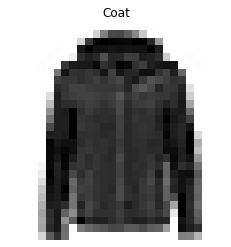

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.title(class_names[y_train[0]])
plt.axis('off')
plt.show()

In [20]:
# 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

> * <code>2</code> : 가장 간단한 케라스의 신경망 모델인 <code>Sequential</code>모델을 생성. 순서대로 연결된 층을 일렬로 쌓아서 구성하고, 이를 Sequential API라고 부름.
> * <code>3</code> : 입력 이미지를 1D 배열로 반환하는 Flatten층을 첫 번째 층으로 추가. 입력 데이터 X를 받으면 X.reshape(-1, 28*28)을 계산.
>   * 모델 파라미터를 가지지 않고 간단한 전처리만 수행
>   * 첫 번째 층이므로 <code>input_shape</code>를 지정해야 함. 배치 크기를 제외하고 샘플의 크기만 써야 함.
>   * 또는 <code>input_shape=[28,28]</code>로 지정된 <code>keras.layers.InputLayer</code>층을 추가할 수도 있음.
> * <code>4, 5</code> : 각각 뉴런 300개, 100개를 가진 Dense 은닉층 추가. ReLU 활성화 함수 사용.
>   * Dense층마다 각자의 가중치 행렬을 관리하고, 이 행렬에는 해당 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함되고 뉴런마다 하나씩 있는 편향도 벡터로 관리함. 
>   * 이 층은 입력 데이터를 받으면 $h_{\mathbf{W}, b}(\mathbf{X})=\phi(\mathbf{XW}+\mathbf{b})$를 계산.
>   * <code>activation="relu"</code>대신 <code>activation=keras.activation.relu</code>사용 가능
> * <code>6</code> : 뉴런 10개를 가진 Dense 출력층 추가. 클래스끼리 배타적이므로 소프트맥스 활성화 함수 사용.

In [21]:
# 위 처럼 하나씩 층을 추가하지 않고 Sequential 모델을 만들 때 각 층의 list를 전달할 수도 있음
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [22]:
# 모델의 모든 층을 출력.
# 각 층의 이름(미 지정 시 자동으로 생성. name 매개변수에 이름 지정 가능), 출력 크기(None은 배치 크기에 어떤 값도 가능하다는 의미), 파라미터 개수를 출력하고, 마지막에는 훈련되는 파라미터와 훈련되지 않는 파라미터를 포함하여 전체 파라미터 개수를 출력
#   여기서는 훈련되는 파라미터만 존재.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


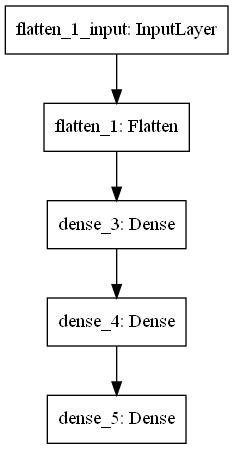

In [23]:
# keras 모델을 이미지로 출력
keras.utils.plot_model(model)

> * Dense층은 보통 많은 파라미터를 가짐
>   * ex) 첫 번째 은닉층은 784*300개의 연결 가중치와 300개의 편향을 가지므로 이들을 더하면 235,500개의 파라미터를 가짐. 이정도 크기의 모델은 훈련 데이터를 학습하기 충분한 유연성을 가지나, 과대적합의 위험 또한 가짐(특히 훈련 데이터가 많지 않을 때).

In [24]:
# 모델에 있는 층의 리스트 출력
model.layers

In [25]:
# 인덱스로 모델의 층 선택 가능
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [26]:
# 이름으로 모델의 층 선택
model.get_layer('dense_3') is hidden1

True

In [27]:
# 층의 모든 파라미터는 get_weights()와 set_weights()를 사용해 접근 가능. Dense 층의 경우 연결 가중치와 편향이 모두 포함되어있음.
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.01909524,  0.04575285, -0.02377108, ..., -0.02618043,
        -0.02459623,  0.04009929],
       [ 0.00255943, -0.01277498, -0.05328912, ...,  0.04174976,
         0.00738778, -0.06766993],
       [-0.02151511,  0.02083602,  0.05235937, ...,  0.05112466,
         0.06476593,  0.00542057],
       ...,
       [ 0.03200036,  0.01330142, -0.02683904, ..., -0.07099872,
        -0.04456173, -0.0673126 ],
       [-0.02107367, -0.04594501,  0.01402111, ..., -0.00265069,
        -0.04471175, -0.01878432],
       [ 0.04602553,  0.03855234, -0.0232105 , ..., -0.00712659,
        -0.06544694, -0.04471882]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

> * Dense층은 연결 가중치를 무작위로 초기화하고, 편향은 0으로 초기화함.
> * 다른 초기화 방법을 사용하고 싶다면 <code>kernel_initializer</code> (kernel은 연결 가중치 행렬의 또 다른 이름)와 <code>bias_initializer</code> 매개변수를 설정 가능
>   * https://keras.io/initializers

In [32]:
# compile을이용해 사용할 손실 함수와 optimizer 지정
# 추가적으로 훈련 및 평가 시 사용할 지표 지정 가능.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

> * 레이블이 정수 하나로 이루어져 있고 클래스가 배타적이므로 <code>"sparse_categorical_crossentropy"</code> 사용
>   * 만약, 샘플마다 클래스 별 타깃 확률을 갖고 있다면 <code>"categorical_crossentropy"</code> 사용
>   * 이진 분류나 다중 레이블 이진 분류를 수행한다면 출력층은 <code>"sigmoid"</code>를 사용하고 <code>"binary_crossentropy"</code> 손실을 사용
> * <code>"sgd"</code>는 기본 확률적 경사 하강법을 사용하여 모델을 훈련한다는 의미.
>   * 보통은 학습률을 <cpde>optimizer=keras.optimizers.SGD(lr=...)</cpde>과 같이 지정함. 기본값은 0.01
> * 모델 평가 시 지표는 정확도(<code>"accuracy"</code>)를 측정함.

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7120 - accuracy: 0.7656 - val_loss: 0.4956 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4868 - accuracy: 0.8290 - val_loss: 0.4876 - val_accuracy: 0.8172
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8434 - val_loss: 0.4417 - val_accuracy: 0.85306 - ac
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4158 - accuracy: 0.8543 - val_loss: 0.3916 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8612 - val_loss: 0.3823 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8659 - val_loss: 0.4068 - val_accuracy: 0.8498
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8707 - val_loss: 0.3787 - val_acc

> * 매개변수로 입력 특성(<code>X_train</code>), 타깃 클래스(<code>y_train</code>), epoch 횟수(기본값은 1), 검증 세트(필수는 아님)를 전달.
> * 한 epoch가 끝날 때 마다 검증 세트를 이용해 손실 및 추가적인 측정 지표를 계산함.
>   * 훈련 세트 성능이 검증 세트보다 훨씬 높다면 과대적합되었다고 볼 수 있음.  (또는 훈련 세트와 검증 세트간의 데이터가 올바르지 않는 경우 등의 버그가 생긴 것.)
> * 여기서는 검증 정확도가 88.8%, 훈련 정확도가 91.8%이므로 둘의 차이가 크지 않아 과대적합이 많이 일어나지 않았다는 의미.

* <code>validation_data</code> 대신 keras에서 직접 검증에 사용할 훈련 세트의 비율을 지정할 수 있음.
  * <code>validation_split=0.1</code>과 같이 사용(섞기 전의 데이터의 마지막 10%를 검증 세트로 사용)

* 각 클래스의 출현 빈도가 다르다면 <code>fit()</code>호출 시 <code>class_weight</code>를 지정하는 것이 좋음. 적게 등장하는 클래스에는 높은 가중치를 부여하고 많이 등장하는 클래스는 낮은 가중치를 부여함.
  * 손실 계산 시 이 가중치를 사용
* 샘플 별로 가중치를 부여하고 싶다면 <code>sample_weight</code>사용.
  * 예를 들어, 샘플의 레이블링이 전문가에 의해 이루어졌는지 크라우드소싱 플랫폼을 이용하여 이루어졌는지에 따라 앞선 레이블링에 더 높은 가중치를 부여할 수 있음.
* class_weight와 sample_weight 둘 다 사용한다면 두 값을 곱하여 사용함.

* fit()에 의해 반환된 History 객체에는 훈련 파라미터(<code>history.params</code>), 수행된 epoch 리스트가 포함(<code>history.epoch</code>).
* history.history에는 epoch가 끝날 때 마다 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 dict가 있음. 이를 이용해 pandas Dataframe을 만들고 학습 곡선을 그릴 수 있음.

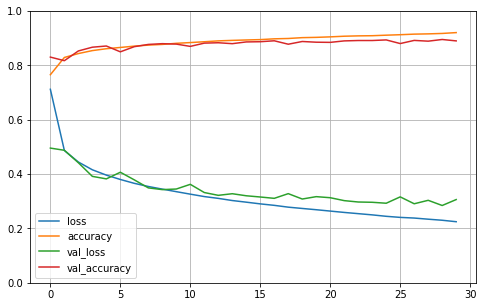

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위 설정
plt.show()

> * 훈련 정확도와 검증 정확도가 꾸준히 상승하고 훈련 손실과 검증 손실은 감소함.
> * 검증 곡선이 훈련 곡선과 가까움. 즉, 크게 과대적합되지 않았다는 의미.
> * 초기에 검증 세트의 성능이 더 좋아보이는 것은 검증 손실은 epoch가 끝난 후에 계산되고 훈련 손실은 epoch 진행 중에 계산되므로 훈련 곡선은 epoch의 절반만큼 왼쪽으로 옮겨서 봐야 함.

* 일반적으로 충분히 오래 훈련하면 훈련 세트의 성능이 검증 세트의 성능보다 좋아짐. 검증 손실이 계속해서 감소한다면 모델이 아직 수렴되지 않았다고 볼 수 있음.
  * keras에서 fit()을 다시 호출하면 중지되었던 곳에서부터 다시 훈련을 이어갈 수 있음.
* 모델 성능이 좋지 않다면 하이퍼파라미터 튜닝이 필요
  * 학습률, optimizer 순으로 확인.
  * 다른 하이퍼파라미터를 바꾸게 되면 학습률을 다시 튜닝해야 함.
  * 그 외에 층 개수, 각 충의 뉴런 개수, 은닉층의 활성화 함수와 같은 모델 하이퍼파라미터 튜닝을 시도할 수 있음.
  * <code>batch_size</code>매개변수를 이용해 배치 크기 지정 가능(기본값은 32)
* <code>evaluate()</code>를 이용해 테스트 세트로 모델 평가 가능
  * 일반적으로는 검증 세트보다 성능이 낮게 나옴(하이퍼파라미터 튜닝이 검증 세트를 기반으로 했기 때문)

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8781


[0.3421423137187958, 0.8780999779701233]

* <code>predict()</code>메서드를 이용해 새로운 샘플에 대한 예측 가능

In [36]:
X_new = X_test[:3]  # 테스트 세트의 처음 3개 샘플을 새로운 샘플로 사용
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

> * 각 이미지에 대한 클래스 추정 확률을 반환.
> * 첫 번째 이미지의 경우 클래스 9(Ankle boot)의 확률이 제일 높음. 그 다음으로는 클래스 7(Sneaker)의 확률이 높고 그 외의 확률은 매우 낮음(즉, 거의 확실히 신발 종류라는 의미)

In [37]:
# 클래스 확률 대신 가장 높은 확률을 가진 클래스만 반환
y_pred = model.predict_classes(X_new)

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
np.array(class_names)[y_test[:3]]   # 예측값이 실제 레이블과 동일함.

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

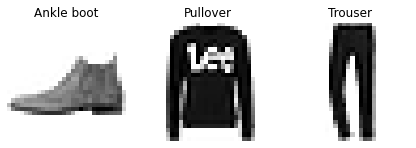

In [41]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Sequential API를 이용한 회귀용 다층 퍼셉트론

In [42]:
# 캘리포니아 주택 가격 dataset 사용
# 누락된 데이터는 없음.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# 모든 특성의 스케일 조정
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [43]:
pd.DataFrame(housing.data, columns = housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [44]:
# 회귀용 MLP는 분류에서 사용했던 것과 거의 동일.
# 하지만 출력층은 활성화 함수가 없는 하나의 뉴런(하나의 값을 예측하기 때문), 손실 함수는 MSE.
# 데이터셋에 잡음이 많으므로 과대적합을 막기 위해 뉴런 수가 적은 은닉층 하나만 사용.

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0401 - val_loss: 0.6503
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5519 - val_loss: 0.5291
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5573 - val_loss: 0.5189
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4817 - val_loss: 0.5025
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4616 - val_loss: 0.4757
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4455 - val_loss: 0.4541
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4380 - val_loss: 0.4539
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4287 - val_loss: 0.4362
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4209 - val_loss: 0.4290
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4151 - val_loss: 0.4233

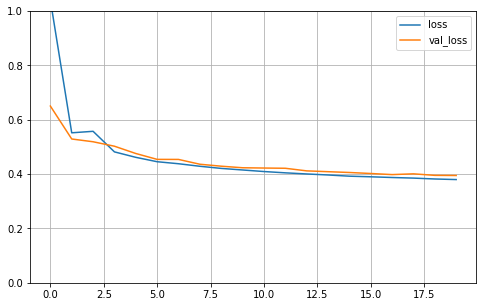

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위 설정
plt.show()

In [46]:
y_pred

array([[4.1304464 ],
       [0.94138616],
       [1.4678792 ]], dtype=float32)

In [47]:
y_test[:3]

array([4.159, 0.934, 1.788])

#### 함수형 API로 복잡한 모델 만들기

* 입력과 출력이 여러 개 이거나 더 복잡한 네트워크를 갖는 신경망을 만들려면 함수형 API사용.
* 순차적이지 않은 신경망의 예로는 Wide&Deep 신경망이 있음.
  * 입력의 일부 또는 전체가 출력층에 바로 연결됨. 이를 사용하면 신경망이 깊게 쌓은 층을 사용한 복잡한 패턴과 짧은 경로를 사용한 간단한 규칙을 모두 학습할 수 있음.
  * 일반적인 MLP는 네트워크에 있는 층 전체에 모든 데이터를 통과시키므로 데이터에 있는 간단한 패턴이 왜곡될 수 있음.

In [48]:
input_ = keras.layers.Input(shape=X_train.shape[1:])            # 1
hidden1 = keras.layers.Dense(30, activation="relu")(input_)     # 2
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)    # 3
concat = keras.layers.Concatenate()([input_, hidden2])          # 4
output = keras.layers.Dense(1)(concat)                          # 5
model = keras.Model(inputs=[input_], outputs=[output])          # 6

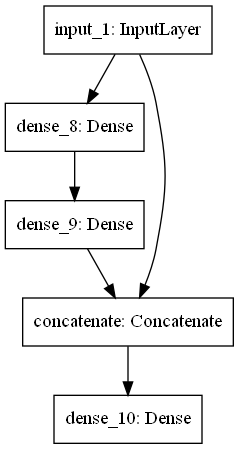

In [49]:
keras.utils.plot_model(model)

> * 1 : Input 객체 생성. <code>shape</code>, <code>dtype</code>을 포함해 모델의 입력을 정의. 한 모델이 여러 개의 입력을 가질 수 있음.
> * 2 : 30개의 뉴런과 활성화 함수로 ReLU를 사용하는 Dense층을 만듦. 만들 때 입력과 함께 함수처럼 호출됨.
>   * python에서 객체를 함수처럼 호출하면 __call__()이 실행되고, 여기서 build()를 호출해 층의 가중치를 생성함.
>   * keras에게 층이 연결될 방법을 알려주고, 데이터는 처리하지 않음.
> * 3 : 두 번째 Dense 은닉층 생성. 첫 번째 은닉층의 출력을 전달함.
> * 4 : Concatenate층을 만들어 두 번째 은닉층의 출력과 입력층을 연결.
>   * <code>axis</code>매개변수를 이용해 연결할 기준 차원을 지정할 수 있음(기본값은 -1, 즉 마지막 차원)
>   * <code>keras.layers.concatenate()</code> 함수를 이용해 주어진 입력으로 바로 Concatenate층을 만들 수 있음.
> * 5 : 활성화 함수가 없는 하나의 뉴런으로 이루어진 출력층을 만듦. Concatenate층이 만든 결과를 사용해 호출
> * 6 : 사용할 입력과 출력을 지정해 keras Model을 만듦.

* 만들어진 모델은 동일하게 컴파일, 훈련, 평가, 예측이 가능.

In [50]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8547 - val_loss: 0.6471
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7453 - val_loss: 0.8266
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4318 - val_loss: 17.6417
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [===================

In [51]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [52]:
y_test[:3]

array([4.159, 0.934, 1.788])

* 일부 특성은 짧은 경로(입력-출력)로 전달하고, 다른 특성들은 깊은 경로(입력-은닉1-은닉2-출력)로 전달한다면 여러 입력을 사용하면 됨.
  * 짧은 경로와 깊은 경로에 전달되는 특성은 중복될 수 있음.

In [53]:
# 특성 index 0~4는 짧은 경로로, 특성 index 2~7은 깊은 경로로 보냄
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

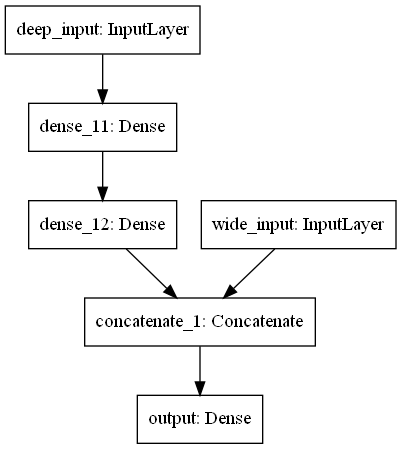

In [54]:
keras.utils.plot_model(model)

> * 복잡한 모델은 <code>name</code>파라미터를 이용해 이름을 붙여줌.

* fit()호출 시 입력은 하나의 입력 행렬 <code>X_train</code>대신 입력마다 하나씩 행렬의 튜플 <code>(X_train_A, X_train_B)</code>를 전달해야 함. validation set과, <code>evaluate(), predict()</code> 호출 시의 X_test와 X_new도 동일.

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0807 - val_loss: 0.9482
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7955 - val_loss: 0.7735
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7077 - val_loss: 0.7152
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6610 - val_loss: 0.6793
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6314 - val_loss: 0.6462
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6042 - val_loss: 0.6222
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5841 - val_loss: 0.6034
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5678 - val_loss: 0.5876
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5546 - val_loss: 0.5727
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5617

In [56]:
y_pred

array([[4.1986513],
       [1.4334967],
       [1.4815218]], dtype=float32)

In [57]:
y_test[:3]

array([4.159, 0.934, 1.788])

* 여러 개의 출력을 가지는 모델도 생성 가능.
  * 여러 출력이 필요한 경우들:
  * ex) 그림에 있는 주요 물체를 분류하고 그 위치를 알아야 할 때 회귀 작업(물체 중심의 좌표, 너비, 높이)과 분류 작업을 함께 해야 함
  * 동일한 데이터에 독립적인 여러 작업을 수행할 때.
    * 작업마다 새로운 신경망을 훈련하는 것 보다 작업마다 하나의 출력을 가진 단일 신경망을 훈련하는 것이 여러 작업에 걸쳐 유용한 특성을 학습할 수 있기 때문에 보통 더 나은 결과가 나옴.(ex. 얼굴 사진으로 다중 작업 분류. 한 출력은 얼굴 표정을 분류하고 다른 출력은 안경을 썼는 지 분류하는 등.)
    * 규제 기법으로 사용할 때. (ex. 신경망 구조 안에 보조 출력을 사용해 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한 것을 학습하는 지 확인하는 데 사용.)
* 각 출력별로 자신만의 손실 함수가 필요하므로 모델 compile시 손실의 리스트를 전달해야 함.
  * 하나만 전달하면 모든 출력의 손실 함수가 동일하다고 가정하게 됨.
  * 리스트로 전달된 손실을 모두 더하여 최종 손실을 구해 훈련에 사용함.
  * 보조 출력은 규제로 사용하므로 주 출력의 손실에 더 많은 가중치를 부여해야 함. <code>loss_weight</code> 매개변수로 지정가능.

In [58]:
# 보조 출력 추가

# 출력층 앞까지는 이전과 동일.
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # 보조 출력층
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

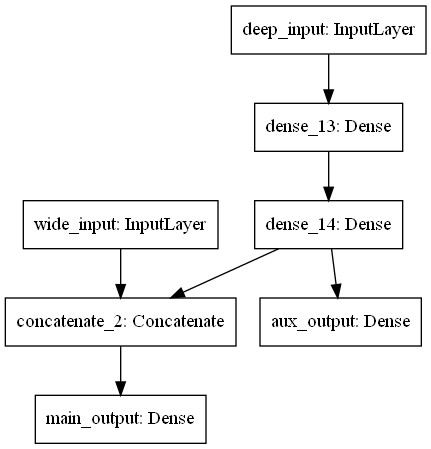

In [59]:
keras.utils.plot_model(model)

In [60]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

* fit() 출력층이 여러개일 때 각 출력에 대한 레이블을 제공해야 함. 여기서는 두 출력이 같은 것을 예측해야 하므로 <code>(y_train, y_train)</code>을 사용.
  * y_valid와 y_test도 동일

In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3355 - main_output_loss: 1.2775 - aux_output_loss: 1.8572 - val_loss: 0.6792 - val_main_output_loss: 0.6047 - val_aux_output_loss: 1.3499
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6406 - main_output_loss: 0.5799 - aux_output_loss: 1.1871 - val_loss: 0.5849 - val_main_output_loss: 0.5308 - val_aux_output_loss: 1.0717
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5393 - main_output_loss: 0.4925 - aux_output_loss: 0.9606 - val_loss: 0.5771 - val_main_output_loss: 0.5373 - val_aux_output_loss: 0.9356
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5064 - main_output_loss: 0.4694 - aux_output_loss: 0.8389 - val_loss: 0.5048 - val_main_output_loss: 0.4686 - val_aux_output_loss: 0.8310
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4939 - main_output_loss: 0.4645 - aux_output_loss: 0.7592 - val_loss

In [62]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])    # 모델 평가 시 각 출력층에 대한 손실과 총 손실을 반환
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])                                 # 예측 시 각 출력층에 대한 예측을 반환

162/162 [==============================] - 0s 1ms/step - loss: 0.3831 - main_output_loss: 0.3699 - aux_output_loss: 0.5016


In [63]:
total_loss, main_loss, aux_loss

(0.383091002702713, 0.3699224293231964, 0.5016090273857117)

In [64]:
y_pred_main, y_pred_aux

(array([[4.0464153],
        [1.3733103],
        [1.3480754]], dtype=float32),
 array([[2.9403977],
        [1.5696578],
        [1.0235612]], dtype=float32))

#### 서브클래싱 API로 동적 모델 만들기

* Sequential, 함수형 API는 사용할 층과 연결 방식을 먼저 정의해야 하고, 그 다음 모델에 데이터를 주입하여 훈련이나 추론을 시작할 수 있음.
  * 모델 저장, 복사, 공유가 쉽고 모델 구조의 출력 및 분석이 좋음.
  * 모델에 데이터를 넣기 전에 에러를 일찍 발견할 수 있음
  * 전체 모델이 층으로 구성된 정적 그래프이므로 디버깅이 쉬움.
* 단, 어떤 모델은 반복문을 포함하고 다양한 크기를 다루어야 하며 조건문을 가지는 등 여러 동적 구조를 필요로 하기도 함.
* 명령형 프로그래밍 스타일이 필요할 때 서브클래싱 API(Subclassing API) 사용

* <code>Model</code>클래스를 상속한 뒤 생성자 내에서 필요한 층을 만듦.
* <code>call()</code>메서드 안에 수행하려는 연산 기술

In [65]:
# 위의 함수형 API로 만든 모델과 동일한 기능을 수행.

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

> * 함수형 API와 달리 Input클래스의 객체를 만들 필요가 없음. 대신 call() 메서드의 inputs매개변수를 사용
> * 생성자에는 층 구성, call()에는 정방향 계산을 분리.
> * call()내에는 원하는 어떠한 계산도 사용할 수 있음.

* 유연성이 높으나, 모델 구조가 call()안에 숨겨져 있으므로 keras가 쉽게 이를 분석할 수 없음. 즉, 모델 저장과 복사가 불가능.
* <code>summary()</code>호출 시 층의 목록만 나열되고 층 간 연결 정보를 알 수 없음.
* keras가 타입과 크기를 미리 확인할 수 없어 실수가 발생하기 쉬움.
  * 보통 높은 유연성이 필요없다면 sequential API나 함수형 API를 사용.

#### 모델 저장

In [ ]:
# sequential API와 함수형 API는 아래와 같은 방법으로 저장.
model.save("my_keras_model.h5")
# 불러오기
model = keras.models.load_model("my_keras_model.h5")

> * 서브클래싱 API는 <code>save_weights()</code>와 <code>load_weights()</code>를 이용해 모델 파라미터를 저장 및 복원할 수 있고 그 외에는 모두 수동으로 저장하고 복구해야 함. 또는 pickle모듈을 사용하여 모델 객체를 직렬화할 수 있음.

* 훈련이 오래 지속되는 경우, 문제가 생겨 훈련과 관련된 정보를 잃을 수도 있으므로, 훈련 도중 체크포인트를 지정하여야 함.
* <code>fit()</code>의 <code>callback</code> 매개변수를 이용해 훈련의 시작 또는 끝에 호출할 객체의 리스트를 지정할 수 있음.
  * 또는 epoch의 시작이나 끝, 각 배치 처리 전후에 호출할 수도 있음.
  * ModelCheckpoint는 매 epoch의 끝에 호출됨.

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.7816
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5571
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4867
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4568
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4374
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4245A: 0s - loss: 0.421
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4086
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4028
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3981


* 훈련 중 검증 세트를 사용한다면 <code>ModelCheckpoint</code>의 매개변수에 <code>save_best_only=True</code>로 지정하면 최상의 검증 세트 점수에서만 모델을 저장하게 됨. 즉, 훈련이 오래 되어 훈련 세트에 과대적합될 걱정을 하지 않아도 됨.
  * 훈련이 끝난 후 저장된 모델을 복원하기만 하면 해당 모델이 검증 세트에서 최상의 점수를 낸 모델.(조기 종료)

In [68]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3935 - val_loss: 0.4031
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3908 - val_loss: 0.4083
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3865 - val_loss: 0.3993
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3832 - val_loss: 0.4013
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3809 - val_loss: 0.3934
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3778 - val_loss: 0.3912
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3750 - val_loss: 0.3913
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3729 - val_loss: 0.3903
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3718 - val_loss: 0.3922
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 0.3832

In [69]:
# 조기 종료의 또 다른 구현
# EarlyStopping 콜백을 사용. patience 매개변수로 지정된 수 만큼의 에포크 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3657 - val_loss: 0.3789
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3639 - val_loss: 0.3781
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3631 - val_loss: 0.3785
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3597 - val_loss: 0.3791
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3583 - val_loss: 0.3732
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3563 - val_loss: 0.3683
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3556 - val_loss: 0.3684
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.3686
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3519 - val_loss: 0.3731
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3511 - val_lo

> * 선택적으로 최상의 모델을 복원할 수 있음(<code>restore_best_weight=True</code>)
> * 컴퓨터가 문제를 일으키는 것을 대비해 체크포인트 저장 콜백과 시간과 자원을 아끼기 위해 조기 종료 콜백을 함께 사용할 수 있음.
> * EarlyStopping 사용 시 에포크 크기가 커도 상관없음.

In [70]:
# 사용자 정의 콜백. 더 많은 제어를 원할 때 사용

# ex) 훈련하는 동안 검증 손실과 훈련 손실의 비율을 출력(과대적합 감지용)
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
printvaltrainratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[printvaltrainratio_cb])

Epoch 1/5
363/363 [==============================] - ETA: 0s - loss: 0.303 - 0s 1ms/step - loss: 0.3036 - val_loss: 0.3220

val/train: 1.06
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3021 - val_loss: 0.3261

val/train: 1.08
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3032 - val_loss: 0.3234

val/train: 1.07
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3223

val/train: 1.06
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3026 - val_loss: 0.3199

val/train: 1.06


> * <code>on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()</code> 사용 가능
> * 검증과 예측 단계에서도 콜백 사용 가능
> * 평가에 사용하려면 <code>on_test_begin(), on_test_end(), on_test_batch_begin(), on_test_batch_end()</code>구현 필요. <code>evaluate()</code>사용 시 호출됨.
> * 예측에 사용하려면 <code>on_predict_begin(), on_predict_end(), on_predict_batch_begin(), on_predict_batch_end()</code>구현 필요. <code>predict()</code>사용 시 호출됨.

#### TensorBoard

* 텐서플로우 인터렉티브 시각화 도구
* 훈련 동안 학습 곡선을 그리거나 여러 실행 간의 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행할 수 있음. 또한 모델이 생성한 이미지 확인이나 3D에 투영된 다차원 데이터를 시각화하여 자동으로 클러스터링 하는 등의 여러 기능도 제공.
* 사용하려면 이벤트 파일이라는 특별한 이진 로그 파일에 시각화하려는 데이터를 출력해야 함.
  * 각 이진 데이터 코드를 summary라고 함.
  * 텐서보드 서버에서 로그 디렉터리를 모니터링하고, 변경사항을 확인하여 그래프를 업데이트함.
* 학습 곡선의 실시간 시각화가 가능.

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)    # my_logs위치에 로그 디렉터리를 생성. 훈련하는 동안 이벤트 파일을 만들고 summary를 기록.
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.2274 - val_loss: 0.9292
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8869 - val_loss: 0.7560
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7807 - val_loss: 0.6919
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7253 - val_loss: 0.6486
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6852 - val_loss: 0.6149
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6533 - val_loss: 0.5887
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6281 - val_loss: 0.5669
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6072 - val_loss: 0.5490
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5902 - val_loss: 0.5343
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5753 - val_loss: 0.5209

```
D:.
└─run_2022_05_07-00_58_16
    ├─train
    │  │  events.out.tfevents.1651852755.DESKTOP.18848.237644.v2
    │  │  events.out.tfevents.1651852755.DESKTOP.profile-empty
    │  │  events.out.tfevents.1651852834.DESKTOP.18848.253307.v2
    │  │
    │  └─plugins
    │      └─profile
    │          ├─2022_05_06_15_59_15
    │          │      DESKTOP.input_pipeline.pb
    │          │      DESKTOP.kernel_stats.pb
    │          │      DESKTOP.memory_profile.json.gz
    │          │      [...]
    │          └─2022_05_06_16_00_35
    │                  DESKTOP.input_pipeline.pb
    │                  DESKTOP.kernel_stats.pb
    │                  DESKTOP.memory_profile.json.gz
    │                  [...]
    └─validation
            events.out.tfevents.1651852756.DESKTOP.18848.238100.v2
            events.out.tfevents.1651852835.DESKTOP.18848.253763.v2
```

* 텐서보드는 profiling trace 파일을 사용해 전체 디바이스에 걸쳐 모델의 각 부분에서 시간이 얼마나 걸렸는지 보여주므로 병목 지점을 찾는 데 도움이 됨.

> ```bash
> > tensorboard --logdir=./my_logs --port=6006
> ```
> ```bash
> Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
> TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
> ```

* 터미널에서 명령어 실행 후, 아래 주소를 통해 접속 가능
* http://localhost:6006
* 또는, 주피터 안에서 바로 사용할 수 있음.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

* SCALARS 탭에서 학습 곡선 확인 가능.

* <code>tf.summary</code>라는 저수준 API 제공.

In [ ]:
# create_file_writer()를 이용해 시각화할 수 있는 스칼라, 히스토그램, 이미지, 오디오, 텍스트 기록
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2)*step/100  # 랜덤 데이터
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)   # 32*32 RGB 이미지
        tf.summary.image("my_images", images*step/1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000*2*np.pi*step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

### 하이퍼파라미터 튜닝

* 여러 하이퍼파라미터를 시도하는 k-fold cross validation 사용.

In [71]:
# 주어진 운닉층 개수, 뉴런 개수로 단방향 회귀 Sequential model 생성 및 반환.
# 주어진 학습률을 사용하는 SGD optimizer로 모델 컴파일

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [72]:
# KerasRegressor 객체 생성

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

> * <code>KerasRegressor</code> : <code>build_model()</code>로 만들어진 모델을 감싸는 wrapper class.
> * 넘겨준 build_model에 파라미터를 넘겨주지 않았으므로 기본값 사용.

* 만들어진 KerasRegressor객체는 일반적인 사이킷런 회귀 추정기처럼 사용 가능.

In [73]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4839 - val_loss: 0.7527
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6995 - val_loss: 0.6600
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6075 - val_loss: 0.6025
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5662 - val_loss: 0.5677
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5406 - val_loss: 0.5603
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5275 - val_loss: 0.5307
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5103 - val_loss: 0.5286
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4967 - val_loss: 0.5096
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4901 - val_loss: 0.5068
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4806 - val_lo

> * fit()로 지정한 매개변수가 keras 모델로 전달됨.
> * scikit은 손실이 아니라 점수를 계산하므로 높을수록 좋음.

* 여러 모델을 훈련하고 검증 세트에서 최선의 모델을 선택해야 하는데, 하이퍼파라미터가 많으므로 RandomizedSearchCV를 사용하는 것이 좋음.

In [74]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2) # 범위 내의 연속적인 역수 반환
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
182/182 [==============================] - 1s 2ms/step - loss: 1.2045 - val_loss: 0.9341
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5824 - val_loss: 0.9176
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5509 - val_loss: 0.9490
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5241 - val_loss: 0.9944
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5060 - val_loss: 1.0252
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5024 - val_loss: 1.0607
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5032 - val_loss: 1.1656
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5103 - val_loss: 1.1462
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5072 - val_loss: 1.1548
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5046 - val_lo

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
182/182 [==============================] - 1s 2ms/step - loss: 4.1357 - val_loss: 3.7441
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 59.5545 - val_loss: 147.5015
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 195.0778 - val_loss: 6888.6147
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 243277.5781 - val_loss: 292793.0000
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 4597635.5000 - val_loss: 11744786.0000
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 16941984.0000 - val_loss: 503340352.0000
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 7982097920.0000 - val_loss: 21002217472.0000
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 334162755584.0000 - val_loss: 928532135936.0000
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 32010064101376.0000 - val_loss

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 5.3689 - val_loss: 4.9887
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 4.2248 - val_loss: 3.9731
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 3.3572 - val_loss: 3.1989
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 2.6967 - val_loss: 2.6088
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 2.1942 - val_loss: 2.1592
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 1.8118 - val_loss: 1.8146
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 1.5194 - val_loss: 1.5519
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 1.2968 - val_loss: 1.3499
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 1.1258 - val_loss: 1.1949
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.9947 - val_loss: 1.0756
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 7.1050 - val_loss: 5.7485
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 5.1894 - val_loss: 4.3126
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 3.8897 - val_loss: 3.3068
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 2.9841 - val_loss: 2.5910
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 2.3415 - val_loss: 2.0762
Epoch 6/100
182/182 [==============================] - 0s 2ms/step - loss: 1.8823 - val_loss: 1.7012
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 1.5490 - val_loss: 1.4243
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 1.3035 - val_loss: 1.2190
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 1.1216 - val_loss: 1.0667
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.9871 - val_loss: 0.9523
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 0s 2ms/step - loss: 2.1490 - val_loss: 1.3007
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 1.0048 - val_loss: 0.9285
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8160 - val_loss: 0.8363
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7623 - val_loss: 0.7901
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7313 - val_loss: 0.7579
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7070 - val_loss: 0.7307
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6865 - val_loss: 0.7084
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6683 - val_loss: 0.6888
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6520 - val_loss: 0.6715
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6372 - val_loss: 0.6553
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 3ms/step - loss: 3.0403 - val_loss: 1.5730
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 1.1889 - val_loss: 0.9391
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8241 - val_loss: 0.7891
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 0.7387 - val_loss: 0.7383
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7052 - val_loss: 0.7093
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6830 - val_loss: 0.6870
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6646 - val_loss: 0.6690
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6484 - val_loss: 0.6533
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6337 - val_loss: 0.6391
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6206 - val_loss: 0.6263
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 1.8043 - val_loss: 0.9056
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7192 - val_loss: 0.7509
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6482 - val_loss: 0.6842
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6046 - val_loss: 0.6359
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5729 - val_loss: 0.5976
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5476 - val_loss: 0.5700
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5273 - val_loss: 0.5474
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5115 - val_loss: 0.5291
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4990 - val_loss: 0.5167
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4887 - val_loss: 0.5044
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 2.1055 - val_loss: 0.8114
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8512 - val_loss: 0.6910
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6370 - val_loss: 0.6365
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5952 - val_loss: 0.6020
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5657 - val_loss: 0.5774
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5437 - val_loss: 0.5554
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5281 - val_loss: 0.5410
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5151 - val_loss: 0.5270
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5055 - val_loss: 0.5187
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4968 - val_loss: 0.5163
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 0.7682 - val_loss: 0.5909
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5027 - val_loss: 0.4952
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 0.4468 - val_loss: 0.4513
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 0.4212 - val_loss: 0.4443
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4136 - val_loss: 0.4268
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3955 - val_loss: 0.4187
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3862 - val_loss: 0.4839
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3812 - val_loss: 0.4216
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3693 - val_loss: 0.4157
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.3674 - val_loss: 0.3976
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 0.7775 - val_loss: 1.2748
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5753 - val_loss: 0.5096
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 0.4734 - val_loss: 0.4509
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4376 - val_loss: 0.4406
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4268 - val_loss: 0.4278
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4159 - val_loss: 0.4253
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 0.4128
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3818 - val_loss: 0.4695
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3812 - val_loss: 0.4772
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3726 - val_loss: 0.4444
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 0s 2ms/step - loss: 1.2646 - val_loss: 0.6996
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5585 - val_loss: 0.7061
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5361 - val_loss: 0.7079
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5202 - val_loss: 0.7269
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5133 - val_loss: 0.7472
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5090 - val_loss: 0.7801
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5138 - val_loss: 0.8063
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5066 - val_loss: 0.8244
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5087 - val_loss: 0.8518
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5028 - val_loss: 0.8728
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 0s 1ms/step - loss: 1.3572 - val_loss: 0.6801
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6753 - val_loss: 0.5995
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5696 - val_loss: 0.5749
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5639 - val_loss: 0.6210
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 1.2730 - val_loss: 0.5909
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5670 - val_loss: 0.6047
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 2.0490 - val_loss: 0.6139
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6112 - val_loss: 0.7104
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 2.7981 - val_loss: 0.7630
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 1.5880 - val_loss: 0.6031
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 2.1566 - val_loss: 1.1740
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8985 - val_loss: 0.9364
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7740 - val_loss: 0.8603
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 0.7334 - val_loss: 0.8162
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7070 - val_loss: 0.7851
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6844 - val_loss: 0.7563
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6645 - val_loss: 0.7311
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6465 - val_loss: 0.7102
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6295 - val_loss: 0.6905
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6140 - val_loss: 0.6706
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 2.7879 - val_loss: 1.1523
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 0.9926 - val_loss: 0.8207
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 0.7801 - val_loss: 0.7547
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 0.7121 - val_loss: 0.7111
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6753 - val_loss: 0.6863
Epoch 6/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6519 - val_loss: 0.6630
Epoch 7/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6307 - val_loss: 0.6453
Epoch 8/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6130 - val_loss: 0.6249
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5957 - val_loss: 0.6111
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5810 - val_loss: 0.5933
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 4.8802 - val_loss: 3.9146
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 2.6052 - val_loss: 2.3867
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 1.6131 - val_loss: 1.6987
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 1.1594 - val_loss: 1.3758
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.9423 - val_loss: 1.2202
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8342 - val_loss: 1.1400
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7765 - val_loss: 1.0968
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7432 - val_loss: 1.0716
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7215 - val_loss: 1.0551
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7058 - val_loss: 1.0445
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 0s 2ms/step - loss: 6.1993 - val_loss: 4.1550
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 2.9593 - val_loss: 2.1619
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 1.6480 - val_loss: 1.3056
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 1.0706 - val_loss: 0.9257
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8102 - val_loss: 0.7514
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6891 - val_loss: 0.6702
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6314 - val_loss: 0.6306
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6031 - val_loss: 0.6109
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5885 - val_loss: 0.6002
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5806 - val_loss: 0.5945
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 2.2721 - val_loss: 1.2481
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 0.9034 - val_loss: 0.8625
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 0.7214 - val_loss: 0.7968
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6791 - val_loss: 0.7579
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6492 - val_loss: 0.7222
Epoch 6/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6260 - val_loss: 0.6969
Epoch 7/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6049 - val_loss: 0.6748
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.6548
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5734 - val_loss: 0.6338
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5600 - val_loss: 0.6189
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 2.5655 - val_loss: 1.1261
Epoch 2/100
182/182 [==============================] - 0s 2ms/step - loss: 0.9243 - val_loss: 0.8288
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7365 - val_loss: 0.7372
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6730 - val_loss: 0.6829
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6333 - val_loss: 0.6454
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6051 - val_loss: 0.6176
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5829 - val_loss: 0.5955
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5646 - val_loss: 0.5775
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5489 - val_loss: 0.5605
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5354 - val_loss: 0.5470
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 1.6899 - val_loss: 0.8669
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7471 - val_loss: 0.7679
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6937 - val_loss: 0.7254
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6645 - val_loss: 0.6969
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6422 - val_loss: 0.6737
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6233 - val_loss: 0.6544
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6072 - val_loss: 0.6372
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.5918 - val_loss: 0.6205
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.6048
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.5640 - val_loss: 0.5915
E

d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


182/182 [==============================] - 1s 2ms/step - loss: 2.3877 - val_loss: 1.1895
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 1.0366 - val_loss: 0.9540
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.8745 - val_loss: 0.8634
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7961 - val_loss: 0.7965
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7420 - val_loss: 0.7472
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.7042 - val_loss: 0.7111
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6760 - val_loss: 0.6832
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6554 - val_loss: 0.6645
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 0.6383 - val_loss: 0.6478
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.6247 - val_loss: 0.6334
E

RandomizedSearchCV(cv=2,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000014B2D79BEE0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014B2FBEA5B0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

> RandomizedSearchCV는 k-fold cross validation을 사용하기 때문에 validation set이 필요없음. 여기서 사용하는 validation set은 조기 종료에 사용.

In [76]:
rnd_search_cv.best_params_

{'learning_rate': 0.015394102216670189, 'n_hidden': 3, 'n_neurons': 74}

In [77]:
rnd_search_cv.best_score_

-0.35982608795166016

In [79]:
model = rnd_search_cv.best_estimator_.model

* 저장된 최적의 모델은 테스트 세트로 평가한 뒤 상용 환경에 배포 가능.
* 모델의 크기가 크면 하이퍼파라미터 탐색에 많은 시간이 소요되므로, 여러 효율적인 탐색 기법이 존재. 주로 탐색 지역이 좋다고 판명될 때 더 탐색을 수행하는 방식을 사용.
  * 수동으로 탐색 영역을 좁히는 것 보다 훨씬 적은 시간에 더 나은 솔루션을 제공함.
  * Hyperopt : 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 라이브러리. https://github.com/hyperopt/hyperopt
  * Hyperas, kopt, Talos : keras 모델을 위한 하이퍼파라미터 최적화 라이브러리. https://github.com/maxpumperla/hyperas, https://github.com/Avsecz/kopt, https://github.com/autonomio/talos
  * Keras tuner : 구글에서 만든 케라스 하이퍼파라미터 최적화 라이브러리. 시각화와 분석을 포함한 클라우드 서비스 제공 예정.
  * Scikit-Optimize(skopt) : 범용 최적화 라이브러리. <code>GridSearchCV</code>와 비슷한 인터페이스를 사용하는 <code>BayesSearchCV</code> (베이즈 최적화) 사용 가능.
  * Spearmint : 베이즈 최적화 라이브러리.https://github.com/JasperSnoek/spearmint
  * Hyperband : 빠른 하이퍼파라미터 튜닝 라이브러리. https://github.com/zygmuntz/hyperband
  * Sklearn-Deap : GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘 기반 하이퍼파라미터 최적화 라이브러리. https://github.com/rsteca/sklearn-deap
* 구글의 AutoML(http://cloud.google.com/automl)과 같은 서비스는 하이퍼파라미터 탐색과 함께 문제에 최적인 신경망 구조를 찾기 위한 진화 전략을 사용함.

#### 은닉층 개수 설정

* 하나의 은닉층만으로도 많은 문제에서 괜찮은 결과를 얻을 수 있음.
  * 이론상 은닉층이 하나인 다층 퍼셈트론도 뉴런 수가 충분하면 복잡한 함수도 모델링할 수 있음.
* 단, 복잡한 문제에서는 심층 신경망이 파라미터 효율성(parameter efficiency)이 좋음. 즉, 심층 신경망이 복잡한 함수를 모델링하는 데 훨씬 적은 수의 뉴런을 사용하므로 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있음.
* 아래쪽 은닉층은 저수준의 구조를 모델링하고, 중간 은닉층은 저수준의 구조를 연결해 중간 수준의 구조를 모델링하고, 위쪽 은닉층과 출력층은 중간 수준의 구조를 연결해 고수준의 구조를 모델링함.
  * ex) 여러 방향이나 모양의 선 -> 사각형 또는 원 -> 얼굴
* 계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와주고, 새로운 데이터에 일반화하는 능력도 향상시킴.
  * ex) 얼굴 인식 모델 훈련 후, 헤어스타일 인식 모델을 훈련하려면 얼굴 인식 모델의 하위 층을 재사용 할 수 있음.
  * 이러한 경우 새로운 신경망(위의 경우 헤어스타일 인식 모델)에서 처음 몇개의 층의 가중치와 편향을 난수로 초기화하는 대신에 첫 번째 신경망(위의 경우 얼굴 인식 모델)에 있는 층의 가중치와 편향값으로 초기화할 수 있음. 이렇게 하면 저수준 구조를 다시 학습할 필요가 없게 되고, 이를 전이 학습(transfer learning)이라고 함.
* MNIST데이터셋의 경우 몇백개의 뉴런을 가진 은닉층 1~2개로 97% 정도의 정확도를 얻을 수 있지만 대규모 이미지 분류나 음성 인식 등은 수십 개 층으로 이루어진 네트워크가 필요하고 훈련 데이터가 아주 많이 필요함. 하지만, 이런 경우 네트워크를 처음부터 훈련하기보다는 비슷한 작업에서 가장 뛰어난 성능을 낸 미리 훈련된 네트워크를 일부 재사용함.

#### 은닉층 뉴런 개수 설정

* 입력층과 출력 층의 뉴런 개수는 작업에 필요한 입력과 출력에 따라 결정됨
  * ex) MNIST 데이터셋의 경우 28*28=784개의 입력 뉴런과 10개의 출력 뉴런 필요
* 은닉층 구성은 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기 모양으로 구성.
  * 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문.
* 요즘은 대부분의 경우 모든 은닉층에 같은 크기를 사용해도 더 나은 성능이 나오기도 함.
  * 데이터셋에 따라 다르지만 다른 은닉층보다 첫 번째 은닉층을 크게 하는 것이 도움됨.

* 네트워크가 과대적합될때까지 뉴런 수를 점진적으로 늘릴 수 있음.
* 실전에서는 필요한 층과 뉴런 수보다 더 많은 것을 가진 모델을 선택하고 과대적합되지 않도록 조기 종료가 규제를 사용하는 것이 효과적.
  * 모델에서 문제를 일으키는 병목 층을 피할 수 있음.
  * 한 층에 뉴런 수가 너무 적으면 입력에 있는 유용한 정보를 모두 유지하기 위한 표현 능력을 가지지 못할 수 있음.
> * 일반적으로 층의 뉴런 수보다 층수를 늘리는 쪽이 이득인 경우가 많음.

#### 학습률, 배치 크기, 다른 하이퍼파라미터

* 학습률 : 가장 중요한 하이퍼파라미터 중 하나. 최적의 학습률은 일반적으로 최대 학습률(훈련 알고리즘이 발산하는 학습률)의 절반 정도.
  * 매우 낮은 학습률($10^{-5}$)에서 시작해 점점 매우 큰 학습률로 증가시키며 수백 번 반복하는 것이 하나의 방법. 반복마다 일정한 값을 학습률에 곱함.
  * 학습률이 증가함에 따라 손실이 줄어들지만, 어느 순간 손실이 다시 늘어나게 되고, 손실이 다시 상승하는 지점보다 조금 아래에 있는 것이 최적의 학습률(일반적으로 상승점보다 10배정도 낮은 지점). 최적의 학습률을 찾으면 모델을 초기화하고 다시 훈련할 수 있음.

* Optimizer : 미니배치 경사 하강법보다 더 좋은 optimizer를 사용하는 것이 도움이 될 수 있음.

* 배치 크기 : 모델 성능과 훈련 시간에 큰 영향을 줌. 배치 크기가 크면 GPU와 같은 하드웨어 가속기를 효율적으로 활용할 수 있음. 즉, 초당 더 많은 샘플을 처리할 수 있음.
  * 보통 GPU 램에 맞는 가장 큰 배치 크기 사용이 권장됨.
  * 단, 실전에서 큰 배치를 사용하면 특히 훈련 초기에 불안정하게 훈련될 수 있음. 결과 모델이 작은 배치로 훈련된 모델만큼 일반화 성능을 내지 못할 수 있음.
* 큰 배치 크기는 일반화 성능에 영향을 끼치지 않고 훈련 시간을 단축함.
  * 학습률 예열(warming up, 작은 학습률로 시작해 점점 키우는 것)을 사용해 큰 배치 크기를 시도해보는 것이 좋을 수 있음. 훈련이 불안정하거나 최종 성능이 좋지 못하면 작은 배치 크기 사용.
  * <code>compile()</code>의 <code>steps_per_execution</code> 매개변수를 1이상으로 설정하면 한 계산 그래프를 실행하는 데 여러 배치를 처리할 수 있으므로 GPU를 최대로 활용하면서 배치 크기를 바꾸지 않고 훈련 속도를 높일 수 있음.

* 활성화 함수 : 일반적으로 ReLU가 모든 은닉층에 좋은 기본값. 출력층의 활성화 함수는 작업에 따라 다름.

* 반복 횟수 : 일반적으로는 튜닝 필요 없음(조기 종료 사용)

> https://arxiv.org/abs/1803.09820 참고

--------------------------

### ex10

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

d:\pythonenv\mlenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\pythonenv\mlenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\pythonenv\mlenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### RandomizedSearchCV 사용

In [34]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [3]:
def build_model(learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(50, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
    return model

In [4]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train.reshape(60000, 28*28), y_train, epochs=30)

In [44]:
y_pred = keras_reg.predict(X_test.reshape(10000,28*28))

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.9425

In [5]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "learning_rate": reciprocal(1e-5, 1e-2)
}

search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, n_jobs=-1)
search_cv.fit(X_train, y_train, epochs=30)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
d:\pythonenv\mlenv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5224
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4837
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3534
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2874
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2471
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2173
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1966
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1800
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1665
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1568
Epoch 11/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1469
Epoch 12/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1388
E

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A6480A42E0>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A6480A4820>})

In [8]:
y_pred = search_cv.best_estimator_.model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_pred, axis=1), y_test)

0.9556

In [13]:
search_cv.best_params_

{'learning_rate': 0.0011742217529897762}

#### callback 사용

In [19]:
# from https://github.com/rickiepark/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
K = keras.backend
class ExponentialLrCallback(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.lr = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.lr.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [20]:
keras.backend.clear_session()

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

expon_lr = ExponentialLrCallback(1.005)

In [40]:
history = model.fit(X_train/255, y_train, epochs=1,
                    callbacks=[expon_lr])

1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987


Text(0, 0.5, 'Loss')

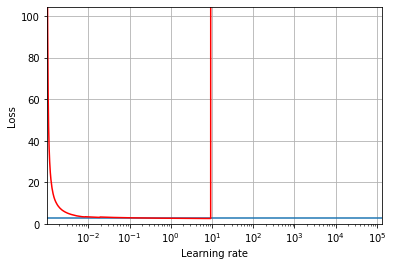

In [41]:
import matplotlib.pyplot as plt

plt.plot(expon_lr.lr, expon_lr.losses, 'r-')
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.lr), max(expon_lr.lr))
plt.axis([min(expon_lr.lr), max(expon_lr.lr), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [43]:
model_new = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model_new.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=9e-1),
              metrics=["accuracy"])

In [45]:
history = model_new.fit(X_train/255, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987A: 1s -
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987A: 

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0980


[nan, 0.09799999743700027]